# Project Deliverable 1 - Group 33

Group Members: Bethany Findlay, Charlotte Albert, Kaykay Akpama, Kosi Udechukwu

## Dataset Choice
o Select one dataset challenge from the Kaggle pool (see below).

o Explain why your team chose this dataset: interest, feasibility, data type, potential for learning, etc.

## Data Dictionary
o Document the features (input variables) and target variable.

o Describe each feature in your own words using the Kaggle dataset description or metadata from other sources.

o Include units (if applicable) and note categorical vs. numerical variables.

## Exploratory Data Analysis (EDA)

o Summarize dataset size and structure.

o Provide descriptive statistics for numerical features.

o Show distributions and visualizations of key variables.

o Check for missing values, outliers, or anomalies.

o Explore correlations or relationships among features.

Install dependencies and read dataset as df

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# read the CSV
df = pd.read_csv('train.csv')

# Summarize dataset size and structure
The dataset has the following columns:
- id (object): the unique identifier for each trip
- vendor_id (integer): the code indicating the provider associated with the trip record
- pickup_datetime (object): date and time when the meter was engaged
- dropoff_datetime (object): date and time when the meter was disengaged
- passenger_count (integer): the number of passengers in the vehicle, entered by driver
- pickup_longitude (float): longitude where the meter was engaged
- pickup_latitude (float): latitude where the meter was engaged
- dropoff_longitude (float): the longitude where the meter was disengaged
- dropoff_latitude (float): the latitude where the meter was disengaged
- store_and_fwd_flag (object): indicates whether the trip record was held in vehicle memory before sending to the vender because the vehicle did not have a connection to the server. 
Y = store and forward; N = not a store and forward trip
- trip_duration (int): duration of the trip in seconds

In [4]:
print(df.head())
# number of rows and columns
df.shape

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

(1458644, 11)

In [5]:
# show number of records in each column, type of data, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


 ## Provide descriptive statistics for numerical features

In [6]:
# statistical summary (count, mean, std, min, max, quartiles)
df.describe(include = "all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [7]:
# ensure the object data types are converted to standard datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')
# check if there are values that could not be converted
df['pickup_datetime'].isna().sum()
df['dropoff_datetime'].isna().sum()

0

### Show distributions and visualizations of key variables

<Axes: xlabel='passenger_count', ylabel='Count'>

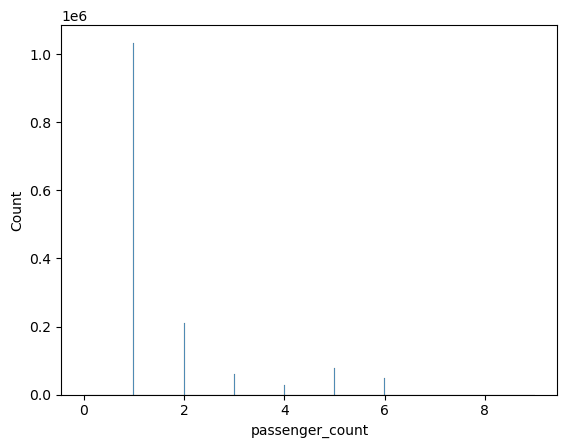

In [8]:
sns.histplot(df['passenger_count'])
#sns.relplot(data=df, x=)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('train.csv')

# Plot trip duration histogram
sns.histplot(data=df, x='trip_duration', bins=100)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df, x='pickup_datetime', bins=100)
plt.title('Pick up Date Time Distribution')


This histogram shows the distribution of the taxi trip durations in the data set. The majority of trips are on the lower end (1 hour or less) with the max being 3.5 million seconds (40 days). Due to this heavy skew and and presence of significant outliers the analysis of trips were limited to one hour so useful and readable data could be drawn from it. 

In [ ]:
# filter trips less than or equal to 1 hour (3600 seconds) to get more useful data 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('train.csv')
df_under_1hr = df[df['trip_duration'] <= 3600]
sns.histplot(df_under_1hr['trip_duration'], bins=100)
plt.title('Trip Duration Distribution (Trips ≤ 1 Hour)')

In [ ]:
sns.histplot(data=df, x='pickup_datetime', bins=100)
plt.title('Pick up Date Time Distribution')
plt.show()


The trip_duration is right-skewed, meaning most trips are short, but a few long trips pull the distribution’s tail to the right. This means that passengers in NYC have many quick rides. This will impact modeling and require transformation or filtering.

In [ ]:
#identify number of trips that are longer than 3 hours(unusual likely error)
long_trips = df[df['trip_duration'] > 10800]    
print(f"Trips longer than 3 hours: {len(long_trips)}")

In [ ]:
#identify number of trips that are under a minute(unusual likely error)
short_trips = df[df['trip_duration'] < 60]
print(f"Trips shorter than 1 minute: {len(short_trips)}")

These are likely outliers or data errors as typical NYC trips are much shorter, however the likelilhood of someone taking a trip under one minute is extremely low. These trips may need to be removed or investigated further to avoid skewing analysis or predictions

In [ ]:
# identify trips with passenger counts that are 0 and passenger counts over 6(unusual likely error)
print(df[df['passenger_count'] == 0].shape[0])
print(df[df['passenger_count'] > 6].shape[0])

In [ ]:
#identify trips whose pickup are outside of the longitude/latitude of NYC (40.5° N to 40.9° N latitude and -74.27° W to -73.68° W longitude)
invalid_pickup = df[
    (df['pickup_longitude'] < -74.27) | (df['pickup_longitude'] > -73.68) |
    (df['pickup_latitude'] < 40.5) | (df['pickup_latitude'] > 40.9)
]

print(f"Invalid pickup coordinates: {len(invalid_pickup)}")

Identified pickup locations that fall outside the geographical bounds of NYC (latitudes between 40.5° N and 40.9° N, longitudes between -74.27° W and -73.68° W). These out-of-bound coordinates likely indicate data entry errors or GPS issues. These records were flagged as invalid and may need to be removed or corrected before modeling.

In [ ]:
#identify the relationship between the pickup hour and the trip duration
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna(subset=['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df_under_1hr['pickup_datetime'] = pd.to_datetime(df_under_1hr['pickup_datetime'], errors='coerce')
df_under_1hr = df_under_1hr.dropna(subset=['pickup_datetime'])
df_under_1hr['pickup_hour'] = df_under_1hr['pickup_datetime'].dt.hour

sns.boxplot(x='pickup_hour', y='trip_duration', data=df_under_1hr)
plt.title("Trip Duration vs Pickup Hour (Trips ≤ 1 Hour)")


This boxplot visualizes the distribution of trip durations (under 1 hour) across different hours of the day. Each box represents the spread of trip durations for a given hour, from 0 (midnight) to 23 (11 PM). It can be observed that trip durations are shorter during late night and early morning hours likely due to less traffic. Durations increase during commuting and day time hours which may reflect rush hour traffic and daytime congestion. Trip duration then gradually decrease into the evening and the night. 

In [ ]:
df_sample = df[df['trip_duration'] <= 3600].sample(100000)

#pick up location vs trip duration 
plt.figure(figsize=(10, 8))
hb = plt.hexbin(
    x=df_sample['pickup_longitude'],
    y=df_sample['pickup_latitude'],
    C=df_sample['trip_duration'],  
    gridsize=250,
    cmap='coolwarm'
)
plt.colorbar(hb, label='Trip Duration (seconds)')
plt.title("Trip Duration by Pickup Location (Trips ≤ 1 Hour)")

# NYC Coordinate bounds
plt.xlim(-74.27, -73.68)
plt.ylim(40.5, 40.9)


This hexbin plot shows spatial distrubution of trip durations accross different pickup locations within NYC the darker hexagons show areas with longer trip durations, while th eblue hexagons indicate shorter trips. Manhattan is located aorund -73.98 longitude and 40.75 latitude and as we can see there is a higher average trip duration around that area. This could be because that is a busier area so it hsa higher traffic and more frequent stops. Additionally, areas that are less popular show shorter durations, possibly showing quicker travels through less congested zones. The geographic insight can be useful in understanding how location affects trip time. 

In [ ]:
df_under_1hr['pickup_day'] = df_under_1hr['pickup_datetime'].dt.day_name()
sns.boxplot(x='pickup_day', y='trip_duration', data=df_under_1hr, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Trip Duration vs Day of Week (Trips ≤ 1 Hour)")
plt.xticks(rotation=90)


This boxplot illustrates how trip durations (for trips under 1 hour) vary across different days of the week. The median trip duration appears relatively consistent from Monday to Friday, with slightly lower durations observed on weekends (Saturday and Sunday). The interquartile range (middle 50% of the data) is wider on weekdays, potentially due to regular commuting patterns. Weekends show a more compact distribution, possibly reflecting more consistent leisure or short-distance travel. Outliers are present across all days, but their frequency and spread are noticeably higher during weekdays.


## Challenges and Strategies

o Identify potential difficulties based on the EDA carried out in step 3 (eg., missing values, outliers, high dimensionality, multicollinearity, imbalance, noise, etc.).

o Propose and apply potential strategies to address them (e.g., imputation, scaling, feature selection, etc.).


## Individual Contributions